In [16]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  gtfs_importer
from quetzal.model import stepmodel, model

import geopandas as gpd
%matplotlib inline

In [17]:
training_folder = '../../'
input_folder = training_folder + r'inputs/'

In [18]:
sm = stepmodel.read_zip(training_folder + 'model/preparation/base.zip')

read_hdf: : 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 63.96it/s]


# add road

In [19]:
road_links = gpd.read_file(input_folder+'road/road_links.geojson', driver='GeoJSON')
road_nodes = gpd.read_file(input_folder+'road/road_nodes.geojson', driver='GeoJSON')
road_nodes.set_index('index', inplace=True)
sm.road_links = road_links
sm.road_nodes = road_nodes

# road integrity

In [20]:
sm.integrity_fix_collision()

can not add prefixes on table:  footpaths


## road_fix

In [21]:
sm.integrity_fix_road_network(cutoff=10, recursive_depth=5)

direct: 10142it [00:04, 2177.36it/s]
reversed: 10142it [00:04, 2430.98it/s]
10008it [00:03, 2503.91it/s]
direct: 10008it [00:03, 2518.38it/s]
reversed: 10008it [00:04, 2497.02it/s]
10006it [00:03, 2548.03it/s]


## road_test

In [22]:
sm.integrity_test_dead_ends()

10006it [00:00, 11105.56it/s]


In [23]:
sm.integrity_fix_nodeset_consistency()

In [24]:
sm.integrity_test_isolated_roads()

# Transport Integrity

## transport_fix

In [25]:
sm.integrity_fix_collision()
sm.integrity_fix_circular_lines()
sm.integrity_fix_sequences()

dropped broken sequences: ['7126352601082481', '7026391111663108', '1026999531904138', '7826999790881055', '1026353381829393', '126356011531123', '1026572650941049', '1026353381829392', '6026797241770434', '6026797241770433', '1026618981581054', '11526352000884475', '1026572651003316', '8226999791364557', '1026618641034640']


## transport_test

In [26]:
sm.integrity_test_circular_lines()
sm.integrity_test_collision()
sm.integrity_test_nodeset_consistency()
sm.integrity_test_sequences()

In [27]:
sm.integrity_test_all(errors='raise')

passed: integrity_test_circular_lines
passed: integrity_test_collision


10006it [00:00, 11827.99it/s]


passed: integrity_test_dead_ends
passed: integrity_test_isolated_roads
passed: integrity_test_nodeset_consistency


10006it [00:03, 2684.02it/s]


passed: integrity_test_road_network
passed: integrity_test_sequences


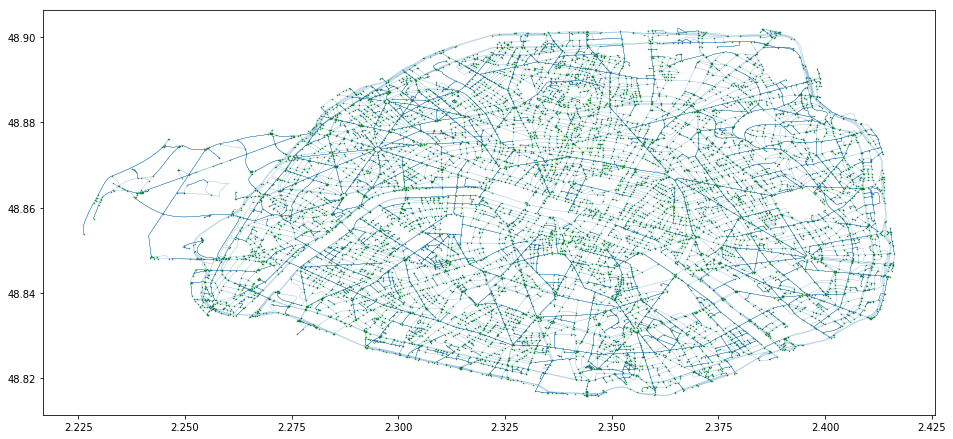

In [28]:
sm.plot(
    'road_nodes', color='green', markersize=0.2,
    ax=sm.plot('road_links', figsize=[16, 9], linewidth=0.2)
)

Reprojecting model from epsg 4326 to epsg 2154: 100%|██████████████████████████████████| 32/32 [00:01<00:00, 17.16it/s]


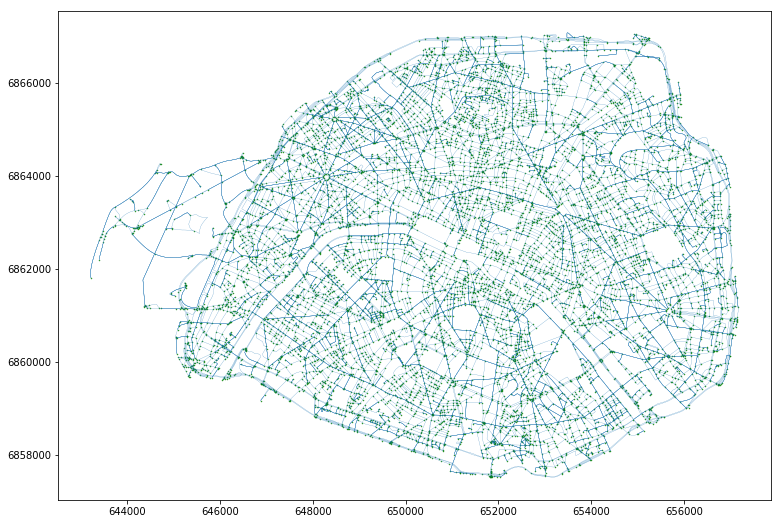

In [29]:
sm = sm.change_epsg(2154, 'meter')

sm.plot(
    'road_nodes', color='green', markersize=0.2,
    ax=sm.plot('road_links', figsize=[16, 9], linewidth=0.2)
)

# to_file

In [30]:
sm.to_zip(training_folder + 'model/preparation/road.zip')   

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 32/32 [00:02<00:00, 11.50it/s]


could not save attribute: missing_nodes
could not save attribute: missing_road_nodes


In [ ]:
sm.to_json(
    training_folder + 'model/latest', 
    save_jsons=False
)  